In [1]:
import os
import numpy as np
import librosa
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Flatten
import pickle

In [4]:
parent_dir = "output_processed_speakers"

speaker_folders = [folder for folder in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, folder))]

In [5]:
speaker_folders

['S1',
 'S10',
 'S11',
 'S12',
 'S13',
 'S14',
 'S15',
 'S16',
 'S17',
 'S18',
 'S19',
 'S2',
 'S20',
 'S21',
 'S22',
 'S23',
 'S24',
 'S25',
 'S26',
 'S27',
 'S28',
 'S29',
 'S3',
 'S30',
 'S31',
 'S32',
 'S33',
 'S34',
 'S35',
 'S36',
 'S37',
 'S38',
 'S39',
 'S4',
 'S40',
 'S41',
 'S42',
 'S43',
 'S44',
 'S45',
 'S46',
 'S47',
 'S48',
 'S49',
 'S5',
 'S50',
 'S6',
 'S7',
 'S8',
 'S9']

In [6]:
len(speaker_folders)

50

In [7]:
def extract_features(parent_dir, speaker_folders, fixed_length=40):
    features = []
    labels = []

    for i, speaker_folder in enumerate(speaker_folders):
        speaker_folder_path = os.path.join(parent_dir, speaker_folder)

        for filename in os.listdir(speaker_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(speaker_folder_path, filename)

                try:
                    audio, sr = librosa.load(file_path, sr=None, duration=1)

                    if len(audio) < 256:
                        print(f"Fichier trop court ignoré: {file_path} (length={len(audio)})")
                        continue

                    n_fft = min(2048, len(audio))

                    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13, n_fft=n_fft)

                    if mfccs.shape[1] == 0:
                        print(f"MFCC vide ignoré: {file_path}")
                        continue

                    mfccs = StandardScaler().fit_transform(mfccs)

                    if mfccs.shape[1] < fixed_length:
                        pad_width = fixed_length - mfccs.shape[1]
                        mfccs = np.pad(mfccs, ((0, 0), (0, pad_width)), mode='constant')
                    else:
                        mfccs = mfccs[:, :fixed_length]

                    features.append(mfccs.T)
                    labels.append(i)

                except Exception as e:
                    print(f"Erreur lors du traitement de {file_path}: {str(e)} - Ignoré")

    return np.array(features), np.array(labels)

In [8]:
X, y = extract_features(parent_dir, speaker_folders)

Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_000_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_001_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_002_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_003_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_004_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_005_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_006_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_008_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_009_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S10\Speaker0035_010_part30.wav (length=66)
Fichier trop court ignoré: output_proces

Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_000_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_001_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_002_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_003_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_004_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_005_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_006_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_008_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_009_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S19\Speaker0044_010_part30.wav (length=66)
Fichier trop court ignoré: output_proces

Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_030_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_032_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_033_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_034_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_035_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_036_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_037_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_038_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_040_part30.wav (length=66)
Fichier trop court ignoré: output_processed_speakers\S24\Speaker0049_041_part30.wav (length=66)
Fichier trop court ignoré: output_proces

In [9]:
X

array([[[-3.46410155e+00,  2.88675129e-01,  2.88675129e-01, ...,
          2.88675129e-01,  2.88675129e-01,  2.88675129e-01],
        [-3.46406460e+00,  2.83390611e-01,  2.94047505e-01, ...,
          2.93047369e-01,  2.84618139e-01,  2.92653263e-01],
        [-3.46404123e+00,  2.81580418e-01,  2.95948863e-01, ...,
          2.93902487e-01,  2.84085065e-01,  2.93116152e-01],
        ...,
        [-3.06279135e+00, -1.79971427e-01, -6.70516193e-02, ...,
          1.86679922e-02,  3.85384202e-01,  1.52710840e-01],
        [-3.06994271e+00,  7.63039172e-01,  5.78142762e-01, ...,
         -2.93160528e-01,  5.32209761e-02, -5.01861311e-02],
        [-3.05695057e+00,  1.34567809e+00,  5.63462079e-01, ...,
         -3.71026456e-01,  1.07797325e-01, -1.35215595e-01]],

       [[-3.04334521e+00,  1.87087977e+00,  9.01409611e-02, ...,
          1.08070262e-01,  2.58464038e-01,  4.45993803e-02],
        [-3.14136481e+00,  1.69358361e+00,  1.25359818e-01, ...,
          1.27683312e-01,  2.01743841e

In [10]:
# Print the first few features
for feature in X[:1]:
    print(feature)

[[-3.4641016   0.28867513  0.28867513  0.28867513  0.28867513  0.28867513
   0.28867513  0.28867513  0.28867513  0.28867513  0.28867513  0.28867513
   0.28867513]
 [-3.4640646   0.2833906   0.2940475   0.2834823   0.2939113   0.28366134
   0.29369164  0.283919    0.293399    0.28424308  0.29304737  0.28461814
   0.29265326]
 [-3.4640412   0.28158042  0.29594886  0.28177088  0.2956665   0.28214127
   0.29521328  0.28267097  0.29461437  0.2833309   0.2939025   0.28408507
   0.29311615]
 [-3.4640388   0.28129768  0.29671243  0.2815429   0.29624572  0.2820121
   0.29550812  0.2826654   0.2945556   0.2834489   0.29345787  0.2843007
   0.29229137]
 [-3.462651    0.3291364   0.3355915   0.31460696  0.31818688  0.29729286
   0.2995388   0.27753097  0.27687067  0.2560984   0.25833714  0.24560566
   0.25385466]
 [-3.4608583   0.35699484  0.36175722  0.33097446  0.32950777  0.29768053
   0.29535234  0.26467964  0.26268232  0.23795915  0.24372503  0.23220724
   0.24733783]
 [-3.459993    0.3695084

In [11]:
# Encode labels with explicit classes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
label_encoder.classes_ = np.array(speaker_folders)

In [12]:
label_encoder.classes_

array(['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17',
       'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25',
       'S26', 'S27', 'S28', 'S29', 'S3', 'S30', 'S31', 'S32', 'S33',
       'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S4', 'S40', 'S41',
       'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S5',
       'S50', 'S6', 'S7', 'S8', 'S9'], dtype='<U3')

In [13]:
y

array([ 0,  0,  0, ..., 49, 49, 49], dtype=int64)

In [14]:
# Save the LabelEncoder as a .pkl file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [15]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of training and validation data
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (52623, 40, 13)
Validation Data Shape: (11276, 40, 13)


In [16]:
# Define a more complex RNN model with more layers
model = Sequential([
    # CNN layers
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # LSTM layers
    LSTM(128, return_sequences=False),
    Dropout(0.3),

    # Fully connected layers
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(len(speaker_folders), activation='softmax')
])

# Compile the model with a dynamic learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32, callbacks=[early_stopping, lr_reduction])

# Check if EarlyStopping triggered
if early_stopping.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training completed without early stopping")

Epoch 1/50
1645/1645 [==============================] - 19s 10ms/step - loss: 1.6556 - accuracy: 0.4928 - val_loss: 0.7938 - val_accuracy: 0.7324 - lr: 0.0010
Epoch 2/50
1645/1645 [==============================] - 19s 11ms/step - loss: 0.8062 - accuracy: 0.7308 - val_loss: 0.5450 - val_accuracy: 0.8176 - lr: 0.0010
Epoch 3/50
1645/1645 [==============================] - 17s 11ms/step - loss: 0.6446 - accuracy: 0.7785 - val_loss: 0.4649 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 4/50
1645/1645 [==============================] - 18s 11ms/step - loss: 0.5646 - accuracy: 0.8061 - val_loss: 0.3799 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 5/50
1645/1645 [==============================] - 18s 11ms/step - loss: 0.5159 - accuracy: 0.8198 - val_loss: 0.3902 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 6/50
1645/1645 [==============================] - 17s 11ms/step - loss: 0.4762 - accuracy: 0.8327 - val_loss: 0.3951 - val_accuracy: 0.8577 - lr: 0.0010
Epoch 7/50
1645/1645 [========================

## Validation:

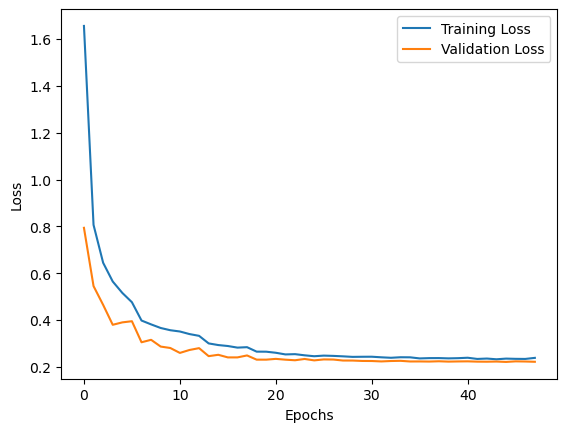

In [17]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

353/353 [==============================] - 1s 2ms/step
Test Evaluation Accuracy: 0.9092843841447193
Weighted F1 Score: 0.906625898009024


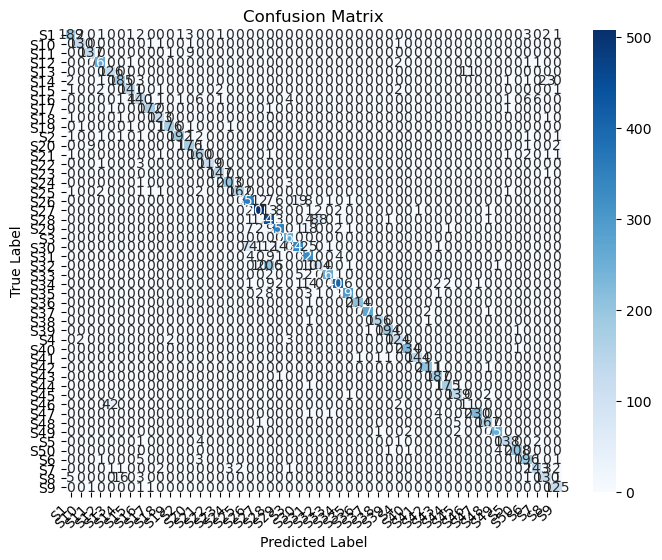

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Decode labels back to original format
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded, labels=speaker_folders)

# Calculate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Test Evaluation Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test_decoded, y_pred_decoded, labels=speaker_folders, average='weighted')
print(f"Weighted F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speaker_folders, yticklabels=speaker_folders)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [19]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test_decoded, y_pred_decoded, labels=speaker_folders, zero_division=0)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

          S1       0.94      0.92      0.93       206
         S10       0.96      0.97      0.97       134
         S11       0.93      0.93      0.93       147
         S12       0.97      0.98      0.97       271
         S13       0.74      0.92      0.82       137
         S14       0.90      0.86      0.88       216
         S15       0.95      0.94      0.95       150
         S16       0.87      0.81      0.84       172
         S17       0.98      0.98      0.98       175
         S18       0.94      0.98      0.96       126
         S19       0.98      0.97      0.98       181
          S2       0.98      0.96      0.97       201
         S20       0.92      0.93      0.92       190
         S21       0.90      0.95      0.92       168
         S22       1.00      0.97      0.98       123
         S23       0.97      0.99      0.98       148
         S24       0.98      0.98      0.98       207
    

In [21]:
model.save('model_speaker_recognition_LSTM_CNN.keras')
print("Modèle enregistré avec succès sous le nom 'model_speaker_recognition_LSTM_CNN.keras'")

Modèle enregistré avec succès sous le nom 'model_speaker_recognition_LSTM_CNN.keras'
